In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("survey_results_public.csv")
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')
df.columns

Rows: 89184, Columns: 84


Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [3]:
df.shape

(89184, 84)

In [4]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [5]:
df.max(axis='rows')

/var/folders/m0/c7j8dd8j0x7f6bgg7f0t7kb80000gn/T/ipykernel_89353/1320856324.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.max(axis='rows')


ResponseId                                                         89184
Q120                                                             I agree
MainBranch                                                 None of these
Age                                                   Under 18 years old
CompTotal              49999999999999992051087350427974655758076739584.0
WorkExp                                                             50.0
ConvertedCompYearly                                           74351432.0
dtype: object

As we can see the maximum compensation is insane. Someone clearly had fun. In this case we should actually find the most realistic number. On official analysis made by Stackoverflow median salary in the US is $200,000. We'll go from this number.

In [6]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df.head()

,Country,EdLevel,YearsCodePro,Employment,ConvertedCompYearly
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [7]:
df = df[df["ConvertedCompYearly"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,ConvertedCompYearly
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              48019 non-null  object 
 1   EdLevel              48019 non-null  object 
 2   YearsCodePro         47825 non-null  object 
 3   Employment           48007 non-null  object 
 4   ConvertedCompYearly  48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [9]:
df = df.dropna()
df.isnull().sum()

Country                0
EdLevel                0
YearsCodePro           0
Employment             0
ConvertedCompYearly    0
dtype: int64

In [10]:
df['Employment'].value_counts()

Employed, full-time                                                                             39155
Independent contractor, freelancer, or self-employed                                             3880
Employed, full-time;Independent contractor, freelancer, or self-employed                         3282
Employed, part-time                                                                               899
Independent contractor, freelancer, or self-employed;Employed, part-time                          238
Employed, full-time;Employed, part-time                                                           152
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      109
Retired                                                                                            33
I prefer not to say                                                                                33
Independent contractor, freelancer, or self-employed;Retired                      

In [11]:
# Check the data like "Employed, full-time;Independent contractor, freelancer, or self-employed;Retired; Independent contractor, freelancer, or self-employed;Retired" and their countries
interest_data = df[(df['Employment'] == 'Employed, full-time;Retired') | (df['Employment'] == 'Employed, part-time;Retired') | (df['Employment'] == 'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired') | (df['Employment'] == 'Independent contractor, freelancer, or self-employed;Retired')] 
interest_data.head(14)

,Country,EdLevel,YearsCodePro,Employment,ConvertedCompYearly
13709,United States of America,"Associate degree (A.A., A.S., etc.)",30,"Independent contractor, freelancer, or self-em...",12000.0
17715,Poland,Something else,16,"Employed, full-time;Retired",16748.0
18455,Russian Federation,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",43,"Employed, part-time;Retired",2970.0
24940,Jordan,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time;Independent contractor, fr...",9850.0
25814,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",31,"Employed, part-time;Retired",29741.0
26737,United States of America,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",30,"Employed, full-time;Retired",150000.0
27934,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",34,"Independent contractor, freelancer, or self-em...",72000.0
34087,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",22,"Employed, full-time;Independent contractor, fr...",25384.0
34248,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",More than 50 years,"Independent contractor, freelancer, or self-em...",150000.0
37089,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,"Independent contractor, freelancer, or self-em...",17876.0


The above data clearly doesn't make sense. I'm getting rid of it. 

In [12]:
# Only keeping the rows where the user said that they are employed somehow without being retired.
df = df[(df['Employment'] == 'Employed, full-time')| (df['Employment'] == 'Employed, part-time') | (df['Employment'] == 'Independent contractor, freelancer, or self-employed')]
df['Employment'].value_counts()

Employed, full-time                                     39155
Independent contractor, freelancer, or self-employed     3880
Employed, part-time                                       899
Name: Employment, dtype: int64

In [13]:
df = df.drop("Employment", axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43934 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              43934 non-null  object 
 1   EdLevel              43934 non-null  object 
 2   YearsCodePro         43934 non-null  object 
 3   ConvertedCompYearly  43934 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.7+ MB


In [14]:
df['Country'].value_counts()

United States of America                                11083
Germany                                                  3706
United Kingdom of Great Britain and Northern Ireland     3359
Canada                                                   1949
India                                                    1698
                                                        ...  
Guyana                                                      1
Guinea-Bissau                                               1
Gabon                                                       1
Tajikistan                                                  1
Antigua and Barbuda                                         1
Name: Country, Length: 170, dtype: int64

In [15]:
df['ConvertedCompYearly'].value_counts()

64254.0     715
53545.0     541
200000.0    535
150000.0    529
74963.0     501
           ... 
31666.0       1
138091.0      1
49583.0       1
251000.0      1
319711.0      1
Name: ConvertedCompYearly, Length: 8280, dtype: int64

It's a lot of numbers (we have 160 countries). We can pick and choose the outliers. Outliers? 
*An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.*
So we need to pick the countries where we have more respondents. We can't really build any predictions with this data. The model will be incorrect.

In [16]:
# a function to choose specific categories.
def pick_countries(countries, number_of_responses):
  countries_dict = {}
  for i in range(len(countries)):
    if countries.values[i] >= number_of_responses:
      countries_dict[countries.index[i]] = countries.index[i]
    else:
      countries_dict[countries.index[i]] = 'Other'
  return countries_dict

In [17]:
countries = pick_countries(df.Country.value_counts(), 110)
df['Country'] = df['Country'].map(countries)
df.Country.value_counts()

United States of America                                11083
Germany                                                  3706
United Kingdom of Great Britain and Northern Ireland     3359
Other                                                    2506
Canada                                                   1949
India                                                    1698
France                                                   1685
Netherlands                                              1258
Australia                                                1105
Brazil                                                   1103
Spain                                                    1075
Poland                                                   1042
Sweden                                                    985
Italy                                                     954
Switzerland                                               621
Austria                                                   486
Denmark 

As it was stated before for the sake of not confusing the numbers and our predictions, we'll use normal frames for salaries (without unrealistic numbers). 

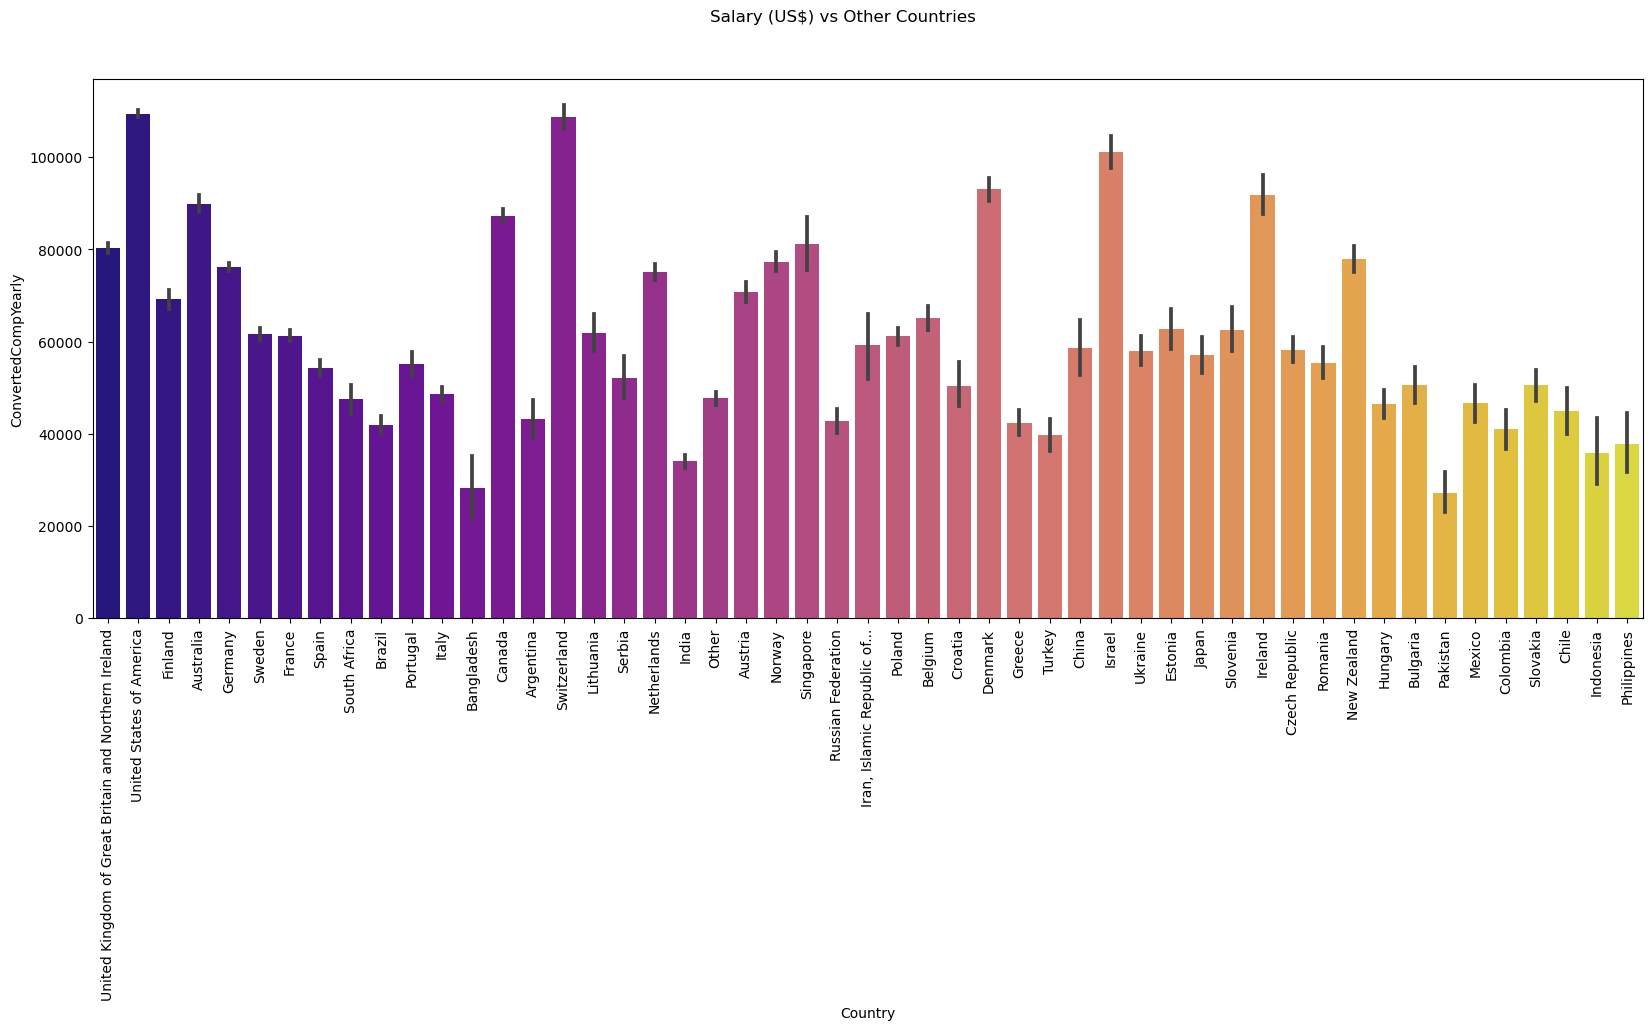

In [18]:
df = df[df["ConvertedCompYearly"] <= 150000]
df = df[df["ConvertedCompYearly"] >= 10000]

fig, ax = plt.subplots(1,1, figsize=(20, 7))
sns.barplot(y='ConvertedCompYearly', x='Country', data=df, palette='plasma')
plt.suptitle('Salary (US$) vs Other Countries')
plt.title('')
plt.ylabel('ConvertedCompYearly')
plt.xticks(rotation=90)
plt.show()


I'm honestly confused with Russian Federation results. They do look like they earned a bunch in 2022.

In [19]:
df["YearsCodePro"].unique()

array(['21', '3', '15', '9', 'Less than 1 year', '10', '2', '6', '14',
       '5', '7', '13', '4', '28', '30', '11', '24', '25', '23', '12',
       '16', '8', '18', '19', '20', '17', '38', '33', '29', '22', '1',
       '27', '31', '34', '26', '37', '42', '39', '36', '40', '41', '32',
       '44', '35', '48', '45', 'More than 50 years', '50', '43', '46',
       '47', '49'], dtype=object)

We do have string values, plus, some of the values are actually just can't be easily converted to numbers. But we need these numbers to be floats. 
'Less than 1 year'= 0.5
'More than 50 years' = 50

In [20]:
def correct_experience(age):
  if age == "More than 50 years":
    return 50
  elif age == 'Less than 1 year':
    return 0.5
  return float(age)
df['YearsCodePro'] = df['YearsCodePro'].apply(correct_experience)
df["YearsCodePro"].unique()


array([21. ,  3. , 15. ,  9. ,  0.5, 10. ,  2. ,  6. , 14. ,  5. ,  7. ,
       13. ,  4. , 28. , 30. , 11. , 24. , 25. , 23. , 12. , 16. ,  8. ,
       18. , 19. , 20. , 17. , 38. , 33. , 29. , 22. ,  1. , 27. , 31. ,
       34. , 26. , 37. , 42. , 39. , 36. , 40. , 41. , 32. , 44. , 35. ,
       48. , 45. , 50. , 43. , 46. , 47. , 49. ])

In [21]:
df['EdLevel'].unique()

array(['Some college/university study without earning a degree',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [22]:
def correct_education(education):
  if "Bachelor’s degree" in education:
    return "Bachelor’s degree"
  elif "Master’s degree" in education:
    return "Master’s degree"
  elif "Professional degree" in education or "Other doctoral" in education:
        return 'PhD'
  else:
    return "No degree"
df['EdLevel'] = df['EdLevel'].apply(correct_education)
df['EdLevel'].unique()

array(['No degree', 'Bachelor’s degree', 'Master’s degree', 'PhD'],
      dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder

label_country = LabelEncoder()
df['Country'] = label_country.fit_transform(df['Country'])
df['Country'].unique()

array([49, 50, 15,  1, 17, 45, 16, 44, 43,  5, 36, 25,  3,  7,  0, 46, 27,
       39, 29, 20, 32,  2, 31, 40, 38, 22, 35,  4, 11, 13, 18, 47,  9, 24,
       48, 14, 26, 42, 23, 12, 37, 30, 19,  6, 33, 28, 10, 41,  8, 21, 34])

In [24]:
label_education = LabelEncoder()
df['EdLevel'] = label_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([2, 0, 1, 3])

X -> features (we are using the columns except for the Compensation variable, we're dropping it)
y -> label (this is what we should predict)

In [25]:
X = df.drop("ConvertedCompYearly", axis=1)
y_true = df["ConvertedCompYearly"] 

In [26]:
X.head()

,Country,EdLevel,YearsCodePro
5,49,2,21.0
6,50,2,3.0
7,50,0,3.0
8,15,1,15.0
11,1,0,9.0


In [27]:
y_true[:20]

5      96828.0
6     135000.0
7      80000.0
8      64254.0
11     78003.0
12     75000.0
13    150000.0
15    107090.0
16     45149.0
17     58899.0
19     75010.0
20     60828.0
21     85672.0
23     69608.0
24     37481.0
25    103743.0
28     38483.0
29     74963.0
31     26374.0
32     53545.0
Name: ConvertedCompYearly, dtype: float64

In [28]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((25534, 3), (8512, 3))

In [29]:
# Evaluating how good is the model
from sklearn.metrics import mean_squared_error
import numpy as np

In [30]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X_train, y_train)
pred = random_forest_reg.predict(X_test)

In [31]:
error = np.sqrt(mean_squared_error(y_test, pred))
print("${:,.02f}".format(error))

$26,061.09


In [32]:
X = np.array([['Russian Federation', 'No degree', 1]])
X

array([['Russian Federation', 'No degree', '1']], dtype='<U21')

In [33]:
X[:, 0] = label_country.transform(X[:,0])
X[:, 1] = label_education.transform(X[:,1])
X = X.astype(float)
X

array([[38.,  2.,  1.]])

In [34]:
y_pred = random_forest_reg.predict(X)
y_pred

/Users/fandorinanna/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([14513.61419048])

In [35]:
import pickle

In [36]:
data = {"model": random_forest_reg, "label_country": label_country, "label_education": label_education}
with open('saved_steps.pkl', 'wb') as file: # wb -> write binary
  pickle.dump(data, file)

In [37]:
with open('saved_steps.pkl', 'rb') as file:
  data = pickle.load(file)

model_loaded = data["model"]
label_country = data["label_country"]
label_education = data["label_education"]

In [38]:
y_pred = model_loaded.predict(X)
y_pred

/Users/fandorinanna/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([14513.61419048])